# Advesarial Attack on License Plate Detecting and OCR

In [ ]:
%cd /content

/content


In [ ]:
!gdown --id 1xchPXf7a1r466ngow_W_9bittRqQEf_T
!unzip LP_detection.zip
!rm LP_detection.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: LP_detection/labels/train/CarLongPlateGen3537.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3538.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3539.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen354.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3540.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3543.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3544.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3545.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3546.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3547.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3548.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3549.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen355.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3550.txt  
  inflating: LP_detection/labels/tr

In [ ]:
!gdown --id 1bPux9J0e1mz-_Jssx4XX1-wPGamaS8mI
!unzip OCR.zip
!rm OCR.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: OCR/images/train/ndata220.jpg  
  inflating: OCR/images/train/ndata221.jpg  
  inflating: OCR/images/train/ndata222.jpg  
  inflating: OCR/images/train/ndata223.jpg  
  inflating: OCR/images/train/ndata224.jpg  
  inflating: OCR/images/train/ndata225.jpg  
  inflating: OCR/images/train/ndata226.jpg  
  inflating: OCR/images/train/ndata227.jpg  
  inflating: OCR/images/train/ndata229.jpg  
  inflating: OCR/images/train/ndata23.jpg  
  inflating: OCR/images/train/ndata230.jpg  
  inflating: OCR/images/train/ndata231.jpg  
  inflating: OCR/images/train/ndata233.jpg  
  inflating: OCR/images/train/ndata234.jpg  
  inflating: OCR/images/train/ndata235.jpg  
  inflating: OCR/images/train/ndata236.jpg  
  inflating: OCR/images/train/ndata237.jpg  
  inflating: OCR/images/train/ndata238.jpg  
  inflating: OCR/images/train/ndata239.jpg  
  inflating: OCR/images/train/ndata24.jpg  
  inflating: OCR/images/train/ndata241.jpg  


In [ ]:
!git clone https://github.com/steveNguyen1206/mhud.git

Cloning into 'mhud'...
remote: Enumerating objects: 795, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 795 (delta 4), reused 24 (delta 4), pack-reused 769
Receiving objects: 100% (795/795), 220.87 MiB | 22.96 MiB/s, done.
Resolving deltas: 100% (434/434), done.


### Testing data and blur

In [ ]:
%cd mhud

/content/mhud


In [ ]:
from attack.deid import Blur, Pixelate
from matplotlib import pyplot as plt
import cv2
from skimage import io
import plotly.express as px
import pandas as pd
import os

In [ ]:
def get_bbox(labels):
    bbox = []
    with open(labels, 'r') as file:
        first_line = file.readline().strip().split(' ')[1:]
        bbox = [float(i) for i in first_line]
    return bbox

In [ ]:
def visualize_bbox(image, bbox, w, h):
  fig = px.imshow(image)
  fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10), xaxis_title='Original image with bounding box')
  fig.add_shape(type='rect',x0=(bbox[0] - bbox[2] / 2)* w, x1=(bbox[0] + bbox[2] / 2)* w, y0=(bbox[1] - bbox[3]/2) * h, y1=(bbox[1] + bbox[3]/2 )* h, xref='x', yref='y',line_color='cyan')
  fig.show()

In [ ]:
img_path = '/content/LP_detection/images/train/CarLongPlate0.jpg'
labels = '/content/LP_detection/labels/train/CarLongPlate0.txt'

input_img = cv2.imread(img_path)
cv2_image = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
h, w, _ = cv2_image.shape
bbox = get_bbox(labels)
visualize_bbox(cv2_image, bbox, w, h)

In [ ]:
def prepare_bbox_for_blure(bbox, w, h):
  # return xmin, xmax, ymin, ymax
  xmin = (int)((bbox[0] - bbox[2] / 2) * w)
  xmax = (int)((bbox[0] + bbox[2] / 2) * w)
  ymin = (int)((bbox[1] - bbox[3] / 2) * h)
  ymax = (int)((bbox[1] + bbox[3] / 2) * h)

  return xmin, xmax, ymin, ymax

In [ ]:
pixelate = Pixelate(21)
bbox = get_bbox(labels)
deid_bbox = prepare_bbox_for_blure(bbox, w, h)
deid_img = pixelate(cv2_image.copy(), deid_bbox)

# Display the image using matplotlib
plt.imshow(deid_img)
plt.axis('off')  # Hide axis
plt.show()

## Blur the dataset

In [ ]:
def blur_dataset(images_path, labels_path, deid_batch, deid_fn):
  df = pd.DataFrame()
  # List the files in the directory
  images_list = sorted(os.listdir(images_path))
  labels_list = sorted(os.listdir(labels_path))
  for image_file, label_file in zip(images_list, labels_list):
    # print(image_file, " ", label_file)
    file_path = os.path.join(images_path, image_file)
    label_path = os.path.join(labels_path, label_file)
    input_img = cv2.imread(file_path)
    cv2_image = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    h, w, _ = cv2_image.shape

    bbox = get_bbox(label_path)
    deid_bbox = prepare_bbox_for_blure(bbox, w, h)
    deid_img = deid_fn(cv2_image.copy(), deid_bbox)

    deid_batch.append(deid_img)

  df['file_name'] = images_list
  df['labels_name'] = labels_list
  df['img'] = deid_batch
  return df

In [ ]:
# Path to the directory
val_img_path = '/content/LP_detection/images/val'
val_label_path = '/content/LP_detection/labels/val'

deid_fn = Blur(14)
# deid_fun = Pixelate(21)
deid_batch = []
deid_batch = blur_dataset(val_img_path, val_label_path, deid_batch, deid_fn)

In [ ]:
# Display the image using matplotlib
bid = 100
plt.imshow(deid_batch['img'][bid])
plt.axis('off')  # Hide axis
plt.show()

## Detect and OCR using pretrained YOLOv5 models

In [ ]:
%cd /content
!git clone https://github.com/trungdinh22/License-Plate-Recognition.git

/content
fatal: destination path 'License-Plate-Recognition' already exists and is not an empty directory.


In [ ]:
%cd License-Plate-Recognition

/content/License-Plate-Recognition


In [ ]:
!pip install -r ./requirement.txt

In [ ]:
# download yolo
import zipfile
!gdown --id 1g1u7M4NmWDsMGOppHocgBKjbwtDA-uIu

zip_file = zipfile.ZipFile("yolov5.zip")
zip_file.extractall()
zip_file.close()

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1g1u7M4NmWDsMGOppHocgBKjbwtDA-uIu
To: /content/License-Plate-Recognition/yolov5.zip
100% 14.0M/14.0M [00:00<00:00, 41.5MB/s]


In [ ]:
ls

CarLongPlate105.txt  CarLongPlate184.txt  CarLongPlate23.txt   LP_recognition.ipynb
CarLongPlate109.txt  CarLongPlate185.txt  CarLongPlate241.txt  model/
CarLongPlate10.txt   CarLongPlate186.txt  CarLongPlate242.txt  ocr_on_original_train.csv
CarLongPlate119.txt  CarLongPlate190.txt  CarLongPlate244.txt  __pycache__/
CarLongPlate11.txt   CarLongPlate191.txt  CarLongPlate248.txt  README.md
CarLongPlate128.txt  CarLongPlate197.txt  CarLongPlate25.txt   requirement.txt
CarLongPlate135.txt  CarLongPlate20.txt   CarLongPlate261.txt  result/
CarLongPlate136.txt  CarLongPlate214.txt  CarLongPlate264.txt  test_image/
CarLongPlate137.txt  CarLongPlate223.txt  CarLongPlate265.txt  training/
CarLongPlate13.txt   CarLongPlate230.txt  CarLongPlate267.txt  webcam.py
CarLongPlate141.txt  CarLongPlate232.txt  CarLongPlate271.txt  yolov5/
CarLongPlate156.txt  CarLongPlate233.txt  CarLongPlate28.txt   yolov5.zip
CarLongPlate159.txt  CarLongPlate235.txt  crop.jpg
CarLongPlate164.txt  CarLongPlate236.txt 

In [ ]:
from PIL import Image
import cv2
import torch
import math
import function.utils_rotate as utils_rotate
from IPython.display import display
import os
import function.helper as helper
import plotly.express as px
from skimage import io

In [ ]:
yolo_LP_detect = torch.hub.load('yolov5', 'custom', path='model/LP_detector.pt', force_reload=True, source='local')
yolo_license_plate = torch.hub.load('yolov5', 'custom', path='model/LP_ocr.pt', force_reload=True, source='local')

INFO:yolov5:YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 290 layers, 20852934 parameters, 0 gradients
Model summary: 290 layers, 20852934 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 
INFO:yolov5:YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

YOLOv5 🚀 v6.1-179-gf3fecf9 torch 2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 290 layers, 20970123 parameters, 0 gradients
Model summary: 290 layers, 20970123 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 


### OCR

Dataset hiện tại không có nhãn cho OCR task, vì thế có thể tạm thời xem kết quả OCR của mô hình hiện tại là basedline (hoặc xem nó là groundtruth )  (hoặc tìm dataset có nhãn ocr)

Input: dataset gốc

Cần một độ đo!!

#### Single Image Inference

In [ ]:
# set model confidence threshold
# yolo_LP_detect.conf = 0.6
yolo_license_plate.conf = 0.60

In [ ]:
#enter image path here
img_file = "/content/LP_detection/images/train/CarLongPlate0.jpg"
img = cv2.imread(img_file)
plates = yolo_LP_detect(img, size=640)

In [ ]:
list_plates = plates.pandas().xyxy[0].values.tolist()
list_read_plates = set()
count = 0
if len(list_plates) == 0:
    lp = helper.read_plate(yolo_license_plate,img)
    if lp != "unknown":
        list_read_plates.add(lp)
else:
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) # xmin
        y = int(plate[1]) # ymin
        w = int(plate[2] - plate[0]) # xmax - xmin
        h = int(plate[3] - plate[1]) # ymax - ymin
        crop_img = img[y:y+h, x:x+w]
        cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite("crop.jpg", crop_img)
        rc_image = cv2.imread("crop.jpg")
        lp = ""
        count+=1
        for cc in range(0,2):
            for ct in range(0,2):
                lp = helper.read_plate(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                if lp != "unknown":
                    list_read_plates.add(lp)
                    flag = 1
                    break
            if flag == 1:
                break

In [ ]:
list_plates

[[156.15975952148438,
  154.62841796875,
  247.4508056640625,
  184.47450256347656,
  0.8719316720962524,
  0,
  'license_plate']]

In [ ]:
file_path = "/content/LP_detection/images/train/CarLongPlate0.jpg"
img = cv2.imread(file_path) #read the image
# xmin-1804/ymin-1734/xmax-2493/ymax-1882
img = io.imread(file_path) #Read the image
fig = px.imshow(img)
fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 8 - N2.jpeg with bounding box')

for plate in list_plates:
  fig.add_shape(type='rect',x0=plate[0], x1=plate[2], y0=plate[1], y1=plate[3], xref='x', yref='y',line_color='red')
fig.show()

{'51G10096'}


<ipython-input-24-3b3717e2d4f8>:6: DeprecationWarning:

ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.



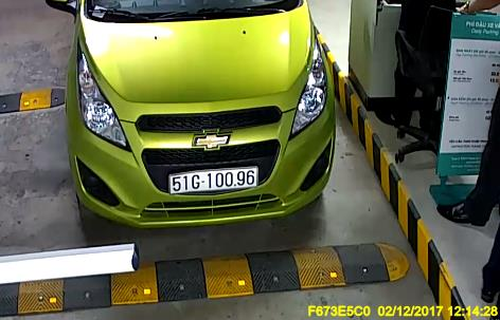

In [ ]:
print(list_read_plates)
img = Image.open(img_file)
basewidth = 500
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
display(img)

In [ ]:
#Đoạn này viết lại hàm read_plate để trả về bounding box của từng ký tự
import math

# license plate type classification helper function
def linear_equation(x1, y1, x2, y2):
    b = y1 - (y2 - y1) * x1 / (x2 - x1)
    a = (y1 - b) / x1
    return a, b

def check_point_linear(x, y, x1, y1, x2, y2):
    a, b = linear_equation(x1, y1, x2, y2)
    y_pred = a*x+b
    return(math.isclose(y_pred, y, abs_tol = 3))

# detect character and number in license plate
def read_plate_and_bboxes(yolo_license_plate, im):
    LP_type = "1"
    results = yolo_license_plate(im)
    bb_list = results.pandas().xyxy[0].values.tolist()
    if len(bb_list) == 0 or len(bb_list) < 7 or len(bb_list) > 10:
        return "unknown", bb_list
    center_list = []
    y_mean = 0
    y_sum = 0
    for bb in bb_list:
        x_c = (bb[0]+bb[2])/2
        y_c = (bb[1]+bb[3])/2
        y_sum += y_c
        center_list.append([x_c,y_c,bb[-1]])

    # find 2 point to draw line
    l_point = center_list[0]
    r_point = center_list[0]
    for cp in center_list:
        if cp[0] < l_point[0]:
            l_point = cp
        if cp[0] > r_point[0]:
            r_point = cp
    for ct in center_list:
        if l_point[0] != r_point[0]:
            if (check_point_linear(ct[0], ct[1], l_point[0], l_point[1], r_point[0], r_point[1]) == False):
                LP_type = "2"

    y_mean = int(int(y_sum) / len(bb_list))
    size = results.pandas().s

    # 1 line plates and 2 line plates
    line_1 = []
    line_2 = []
    license_plate = ""
    if LP_type == "2":
        for c in center_list:
            if int(c[1]) > y_mean:
                line_2.append(c)
            else:
                line_1.append(c)
        for l1 in sorted(line_1, key = lambda x: x[0]):
            license_plate += str(l1[2])
        license_plate += "-"
        for l2 in sorted(line_2, key = lambda x: x[0]):
            license_plate += str(l2[2])
    else:
        for l in sorted(center_list, key = lambda x: x[0]):
            license_plate += str(l[2])
    return license_plate, bb_list

In [ ]:
list_read_plates = []
list_read_char_bbox = []
for plate in list_plates:
  flag = 0
  x = int(plate[0]) # xmin
  y = int(plate[1]) # ymin
  w = int(plate[2] - plate[0]) # xmax - xmin
  h = int(plate[3] - plate[1]) # ymax - ymin
  crop_img = img[y:y+h, x:x+w]
  cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
  cv2.imwrite("crop.jpg", crop_img)
  rc_image = cv2.imread("crop.jpg")
  lp = ""
  count+=1
  for cc in range(0,2):
      for ct in range(0,2):
          lp, bbox = read_plate_and_bboxes(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
          if lp != "unknown":
              list_read_plates.append(lp)
              list_read_char_bbox.append(bbox)
              flag = 1
              break
      if flag == 1:
          break

In [ ]:
# list này là kết quả trả về ban đầu của mô hình ocr
# mỗi phần tử của list bao gồm:
#   bounding box của ký tự: xmin, ymin, xmax, ymax
#   index của nhãn: 0 -> 36
#   độ tin cậy: score !
#   nhãn tương ứng với index: 0 -> Z
print(list_read_char_bbox)

[[[76.62709045410156, 6.809934616088867, 84.49676513671875, 21.128257751464844, 0.9205214381217957, 5, '6'], [67.45806884765625, 7.475137710571289, 75.22606658935547, 21.866430282592773, 0.9120851755142212, 8, '9'], [56.59181213378906, 8.425005912780762, 63.9478874206543, 22.7878360748291, 0.90915846824646, 29, '0'], [24.484739303588867, 10.81662654876709, 32.64958572387695, 25.119333267211914, 0.8976008296012878, 15, 'G'], [6.635669231414795, 12.734107971191406, 14.925415992736816, 27.066295623779297, 0.8975638747215271, 4, '5'], [47.423587799072266, 9.013790130615234, 55.137447357177734, 23.27781867980957, 0.8833109736442566, 29, '0'], [16.64128875732422, 12.171347618103027, 21.624984741210938, 26.24346923828125, 0.8381661772727966, 0, '1'], [39.263858795166016, 9.414424896240234, 43.94099807739258, 24.297666549682617, 0.8205747604370117, 0, '1']]]


#### Dataset Inference

In [ ]:
def ocr_dataset(images_path, chars_bbox_save_path = None):
    dff = pd.DataFrame(columns=["file_name", "ocr_text"])
    # List the files in the directory
    images_list = sorted(os.listdir(images_path))

    if chars_bbox_save_path != None and not os.path.exists(chars_bbox_save_path):
        os.makedirs(chars_bbox_save_path)

    for image_file in images_list:

        file_path = os.path.join(images_path, image_file)
        img = cv2.imread(file_path)
        plates = yolo_LP_detect(img, size=640)
        # print(f"Processing file: {image_file}")

        # OCR
        list_plates = plates.pandas().xyxy[0].values.tolist()
        list_read_plates = []
        char_bboxes = []
        new_rows = []
        # print(f"Detected plates: {list_plates}")

        if len(list_plates) == 0:
            lp = helper.read_plate(yolo_license_plate, img)
            print(f"Read plate: {lp}")
            if lp != "unknown":
                list_read_plates.append(lp)
        else:
          for plate in list_plates:
              flag = 0
              x = int(plate[0]) # xmin
              y = int(plate[1]) # ymin
              w = int(plate[2] - plate[0]) # xmax - xmin
              h = int(plate[3] - plate[1]) # ymax - ymin

              crop_img = img[y:y+h, x:x+w]
              cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
              cv2.imwrite("crop.jpg", crop_img)
              rc_image = cv2.imread("crop.jpg")
              lp = ""
              # count+=1
              for cc in range(0,2):
                  for ct in range(0,2):
                      lp, bboxes = read_plate_and_bboxes(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                      if lp != "unknown":
                          list_read_plates.append(lp)
                          char_bboxes.append(bboxes)
                          flag = 1
                          break
                  if flag == 1:
                      break
        # save label, xmin, ymin, xmax, ymax of each char into a text
        if chars_bbox_save_path != None:
          #convert image file name to txt file name
          txt_file = image_file.replace(".jpg", ".txt")
          file_path = os.path.join(chars_bbox_save_path, txt_file)
          f = open(file_path, "w")
          for bbox in char_bboxes:
              for xmin, ymin, xmax, ymax, score, index, label in bbox:
                  f.write(f"{index} {xmin} {ymin} {xmax} {ymax}\n")
          f.close()

        # print(f"List read plates: {list_read_plates}")

        ocr_text = ""
        for lp in list_read_plates:
            ocr_text += lp

        new_row = {"file_name": image_file, "ocr_text": ocr_text}
        dff = pd.concat([dff, pd.DataFrame([new_row])], ignore_index=True)

    return dff

In [ ]:
train_img_path = '/content/LP_detection/images/train'
val_img_path = '/content/LP_detection/images/val'

In [ ]:
dff_train = ocr_dataset(train_img_path, '/content/LP_detect_2_ocr/train')
dff_train.to_csv("ocr_on_original_train.csv", index=False)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarni

Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)



Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: 65X1-7953
Read plate: 65P7-4210
Read plate: 68V2-6087
Read plate: 65F1-03952
Read plate: 65X4-7589


In [ ]:
dff_val = ocr_dataset(val_img_path, '/content/LP_detect_2_ocr/val')
dff_val.to_csv("ocr_on_original_val.csv", index=False)

Read plate: unknown


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)



Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)



Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)



Read plate: unknown
Read plate: unknown


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)



Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown
Read plate: unknown


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarni

Read plate: 94H5-2146


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)



Tạo ra nhãn là character và bounding box của các character trong một biển số xe

In [ ]:
!zip -r /content/LP_detect_2_ocr.zip /content/LP_detect_2_ocr

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  adding: content/LP_detect_2_ocr/train/CarLongPlateGen3153.txt (deflated 48%)
  adding: content/LP_detect_2_ocr/train/CarLongPlateGen2749.txt (deflated 47%)
  adding: content/LP_detect_2_ocr/train/CarLongPlateGen2986.txt (deflated 47%)
  adding: content/LP_detect_2_ocr/train/CarLongPlateGen3548.txt (deflated 48%)
  adding: content/LP_detect_2_ocr/train/xemay1609.txt (deflated 49%)
  adding: content/LP_detect_2_ocr/train/xemay483.txt (deflated 49%)
  adding: content/LP_detect_2_ocr/train/cropquandoi16.txt (stored 0%)
  adding: content/LP_detect_2_ocr/train/CarLongPlateGen1621.txt (deflated 48%)
  adding: content/LP_detect_2_ocr/train/xemay1126.txt (deflated 48%)
  adding: content/LP_detect_2_ocr/train/CarLongPlateGen3034.txt (deflated 48%)
  adding: content/LP_detect_2_ocr/train/CarLongPlateGen2181.txt (deflated 47%)
  adding: content/LP_detect_2_ocr/train/CarLongPlateGen1254.txt (deflated 47%)
  adding: content/LP_detect_2_ocr/t

### OCR trên tập Blur

In [ ]:
def ocr_dataset_blur(deid_batch):
    dff = pd.DataFrame(columns=["file_name", "ocr_text"])

    for img, file_name in zip(deid_batch['img'], deid_batch['file_name']):
        plates = yolo_LP_detect(img, size=640)
        print(f"Processing file: {file_name}")

        # OCR
        list_plates = plates.pandas().xyxy[0].values.tolist()
        list_read_plates = set()

        print(f"Detected plates: {list_plates}")

        if len(list_plates) == 0:
            lp = helper.read_plate(yolo_license_plate, img)
            print(f"Read plate: {lp}")
            if lp != "unknown":
                list_read_plates.add(lp)
        else:
          for plate in list_plates:
              flag = 0
              x = int(plate[0]) # xmin
              y = int(plate[1]) # ymin
              w = int(plate[2] - plate[0]) # xmax - xmin
              h = int(plate[3] - plate[1]) # ymax - ymin

              crop_img = img[y:y+h, x:x+w]
              cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
              cv2.imwrite("crop.jpg", crop_img)
              rc_image = cv2.imread("crop.jpg")
              lp = ""
              # count+=1
              for cc in range(0,2):
                  for ct in range(0,2):
                      lp = helper.read_plate(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                      if lp != "unknown":
                          list_read_plates.add(lp)
                          flag = 1
                          break
                  if flag == 1:
                      break

        print(f"List read plates: {list_read_plates}")

        ocr_text = ""
        for lp in list_read_plates:
            ocr_text += lp

        new_row = {"file_name": file_name, "ocr_text": ocr_text}
        dff = pd.concat([dff, pd.DataFrame([new_row])], ignore_index=True)

    return dff

In [ ]:
dff = ocr_dataset_blur(deid_batch)
dff.to_csv("ocr_on_blur_val.csv", index=False)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Processing file: CarLongPlateGen1251.jpg
Detected plates: []
Read plate: unknown
List read plates: set()
Processing file: CarLongPlateGen1252.jpg
Detected plates: []
Read plate: unknown
List read plates: set()
Processing file: CarLongPlateGen1256.jpg
Detected plates: []
Read plate: unknown
List read plates: set()
Processing file: CarLongPlateGen1257.jpg
Detected plates: [[154.1358642578125, 132.19674682617188, 263.4693908691406, 164.41162109375, 0.36704784631729126, 0, 'license_plate']]
List read plates: set()
Processing file: CarLongPlateGen1258.jpg
Detected plates: []
Read plate: unknown
List read plates: set()
Processing file: CarLongPlateGen1264.jpg
Detected plates: []
Read plate: unknown
List read plates: set()
Processing file: CarLongPlateGen1269.jpg
Detected plates: []
Read plate: unknown
List read plates: set()
Processing file: CarLongPlateGen1273.jpg
Detected plates: [[302.46282958984375, 230.02760314941406, 379.05523681

### Detect

In [ ]:
def detect_dataset(images_path):
  x_min_predict = []
  x_max_predict = []
  y_min_predict = []
  y_max_predict = []

  images_list = sorted(os.listdir(images_path))
  indexing = 0
  for image_file in images_list:
    indexing+=1
    # print(indexing)
    file_path = os.path.join(images_path, image_file)
    img = cv2.imread(file_path)
    plates = yolo_LP_detect(img, size=640)
    list_plates = plates.pandas().xyxy[0].values.tolist()
    if len(list_plates) == 0:
      xmin = 0
      xmax = 0
      ymin = 0
      ymax = 0
    else:
      xmin = list_plates[0][0]
      xmax = list_plates[0][2]
      ymin = list_plates[0][1]
      ymax = list_plates[0][3]

    x_min_predict.append(xmin)
    x_max_predict.append(xmax)
    y_min_predict.append(ymin)
    y_max_predict.append(ymax)

  bboxes_predict = pd.DataFrame({
      'file_name': images_list,
      'x_min_predict': x_min_predict,
      'x_max_predict': x_max_predict,
      'y_min_predict': y_min_predict,
      'y_max_predict': y_max_predict
  })
  return bboxes_predict

In [ ]:
bbox_pred_train_imgs = detect_dataset(train_img_path)

In [ ]:
bbox_pred_train_imgs.to_csv("detect_on_original_train.csv")

In [ ]:
bbox_pred_val_imgs = detect_dataset(val_img_path)

In [ ]:
bbox_pred_val_imgs.to_csv("detect_on_original_val.csv")

#### Detect trên tập Blur

In [ ]:
def get_bboxes_predict_from_blur_images(deid_batch):
  x_min_predict_2 = []
  x_max_predict_2 = []
  y_min_predict_2 = []
  y_max_predict_2 = []
  indexing = 0

  for blur_image in deid_batch['img']:
    indexing+=1
    print(indexing)
    # file_path = os.path.join(train_img_path, image_file)
    # img = cv2.imread(file_path)
    plates = yolo_LP_detect(blur_image, size=640)
    list_plates = plates.pandas().xyxy[0].values.tolist()
    if len(list_plates) == 0:
      xmin = 0
      xmax = 0
      ymin = 0
      ymax = 0
    else:
      xmin = list_plates[0][0]
      xmax = list_plates[0][2]
      ymin = list_plates[0][1]
      ymax = list_plates[0][3]

    x_min_predict_2.append(xmin)
    x_max_predict_2.append(xmax)
    y_min_predict_2.append(ymin)
    y_max_predict_2.append(ymax)

  bboxes_predict_2 = pd.DataFrame({
      'x_min_predict': x_min_predict_2,
      'x_max_predict': x_max_predict_2,
      'y_min_predict': y_min_predict_2,
      'y_max_predict': y_max_predict_2
  })
  return bboxes_predict_2

In [ ]:
bbox_pred_blur = get_bboxes_predict_from_blur_images(deid_batch)
bbox_pred_blur.to_csv("detect_on_blur_val.csv")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


##Adversarial Attack

In [ ]:
print(yolo_LP_detect)

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 48, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(48, 48, kernel_size=(1, 1), stride=(1, 1))
           

In [ ]:
print(yolo_license_plate)

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 48, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(48, 48, kernel_size=(1, 1), stride=(1, 1))
           

### Perapre Wrapper Class Of Detect and OCR for attack

#### Get raw tensor ouput for compute loss

In [ ]:
%cd /content/License-Plate-Recognition/

/content/License-Plate-Recognition


Hàm sau nhằm mục đính lấy ra output trực tiếp của mô hình để phục vụ việc tính loss. Mô hình được load từ torch.hub là một hight-level wrapper class (class AutoShape trong yolov5.models.common) phục vụ cho việc inference, nên output đầu ra đã được filter. Để có được output gốc, cần phải thay đổi quá trình inference của wrapper class đó. Hàm raw_inference sau đây là sửa đổi của hàm forward của class AutoShape

In [ ]:
from pathlib import Path
import requests
import numpy as np
import torch
import cv2
from yolov5.utils.datasets import exif_transpose, letterbox
from yolov5.utils.torch_utils import copy_attr, time_sync
from yolov5.utils.general import non_max_suppression, scale_coords, xyxy2xywh

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def make_divisible(x, divisor):
    """Adjusts `x` to be divisible by `divisor`, returning the nearest greater or equal value."""
    if isinstance(divisor, torch.Tensor):
        divisor = int(divisor.max())  # to int
    return math.ceil(x / divisor) * divisor

def raw_inference(self, imgs, size=640, augment=False, profile=False):
    conf = 0.25  # NMS confidence threshold
    iou = 0.45  # NMS IoU threshold
    agnostic = False  # NMS class-agnostic
    multi_label = False  # NMS multiple labels per box
    classes = None  # (optional list) filter by class, i.e. = [0, 15, 16] for COCO persons, cats and dogs
    max_det = 1000  # maximum number of detections per image
    amp = False  # Automatic Mixed Precision (AMP) inference

    # Inference from various sources. For height=640, width=1280, RGB images example inputs are:
    #   file:       imgs = 'data/images/zidane.jpg'  # str or PosixPath
    #   URI:             = 'https://ultralytics.com/images/zidane.jpg'
    #   OpenCV:          = cv2.imread('image.jpg')[:,:,::-1]  # HWC BGR to RGB x(640,1280,3)
    #   PIL:             = Image.open('image.jpg') or ImageGrab.grab()  # HWC x(640,1280,3)
    #   numpy:           = np.zeros((640,1280,3))  # HWC
    #   torch:           = torch.zeros(16,3,320,640)  # BCHW (scaled to size=640, 0-1 values)
    #   multiple:        = [Image.open('image1.jpg'), Image.open('image2.jpg'), ...]  # list of images

    t = [time_sync()]
    p = next(self.model.parameters()) if self.pt else torch.zeros(1, device=self.model.device)  # for device, type
    autocast = self.amp and (p.device.type != 'cpu')  # Automatic Mixed Precision (AMP) inference
    if isinstance(imgs, torch.Tensor):  # torch
        with amp.autocast(autocast):
            return self.model(imgs.to(p.device).type_as(p), augment, profile)  # inference

    # Pre-process
    n, imgs = (len(imgs), list(imgs)) if isinstance(imgs, (list, tuple)) else (1, [imgs])  # number, list of images
    shape0, shape1, files = [], [], []  # image and inference shapes, filenames
    for i, im in enumerate(imgs):
        f = f'image{i}'  # filename
        if isinstance(im, (str, Path)):  # filename or uri
            im, f = Image.open(requests.get(im, stream=True).raw if str(im).startswith('http') else im), im
            im = np.asarray(exif_transpose(im))
        elif isinstance(im, Image.Image):  # PIL Image
            im, f = np.asarray(exif_transpose(im)), getattr(im, 'filename', f) or f
        files.append(Path(f).with_suffix('.jpg').name)
        if im.shape[0] < 5:  # image in CHW
            im = im.transpose((1, 2, 0))  # reverse dataloader .transpose(2, 0, 1)
        im = im[..., :3] if im.ndim == 3 else np.tile(im[..., None], 3)  # enforce 3ch input
        s = im.shape[:2]  # HWC
        shape0.append(s)  # image shape
        g = (size / max(s))  # gain
        shape1.append([y * g for y in s])
        imgs[i] = im if im.data.contiguous else np.ascontiguousarray(im)  # update
    shape1 = [make_divisible(x, self.stride) if self.pt else size for x in np.array(shape1).max(0)]  # inf shape
    x = [letterbox(im, shape1, auto=False)[0] for im in imgs]  # pad
    x = np.ascontiguousarray(np.array(x).transpose((0, 3, 1, 2)))  # stack and BHWC to BCHW
    x = torch.from_numpy(x).to(p.device).type_as(p) / 255  # uint8 to fp16/32
    t.append(time_sync())

    # with amp.autocast(autocast):
    # Inference
    y = self.model(x, augment, profile)  # forward
    t.append(time_sync())

    # Post-process
    y_post = non_max_suppression(y if self.dmb else y[0],
                            self.conf,
                            self.iou,
                            self.classes,
                            self.agnostic,
                            self.multi_label,
                            max_det=self.max_det)  # NMS
    for i in range(n):
        scale_coords(shape1, y_post[i][:, :4], shape0[i])

    t.append(time_sync())
    return y, Detections(imgs, y_post, files, t, self.names, x.shape)

In [ ]:
img_file = "/content/LP_detection/images/train/CarLongPlate0.jpg"
img = cv2.imread(img_file)

raw_detect_tensor, plates_detect_from_raw = raw_inference(yolo_LP_detect, img, size=640)
print('shape of raw detect tensor: ', raw_detect_tensor.shape)

# Kiểm chứng tính chứng xác của row tensor
list_plates_from_raw = plates_detect_from_raw.pandas().xyxy[0].values.tolist()
print('result plates from raw tensor: ',list_plates_from_raw)

shape of raw detect tensor:  torch.Size([1, 16380, 6])
result plates from raw tensor:  [[156.1597442626953, 154.62841796875, 247.4508056640625, 184.47450256347656, 0.8719316720962524, 0, 'license_plate']]


Đoạn code dưới đây chỉ nhằm mục đính kiểm chứng tính chính xác của raw tensor bằng cách thực hiện filter trên raw tesor để cho ra output (OCR)


In [ ]:
def linear_equation(x1, y1, x2, y2):
    b = y1 - (y2 - y1) * x1 / (x2 - x1)
    a = (y1 - b) / x1
    return a, b

def check_point_linear(x, y, x1, y1, x2, y2):
    a, b = linear_equation(x1, y1, x2, y2)
    y_pred = a*x+b
    return(math.isclose(y_pred, y, abs_tol = 3))

# detect character and number in license plate
def read_plate_from_results(results):
    LP_type = "1"
    bb_list = results.pandas().xyxy[0].values.tolist()
    # print(bb_list)
    if len(bb_list) == 0 or len(bb_list) < 7 or len(bb_list) > 10:
        return "unknown"
    center_list = []
    y_mean = 0
    y_sum = 0
    for bb in bb_list:
        x_c = (bb[0]+bb[2])/2
        y_c = (bb[1]+bb[3])/2
        y_sum += y_c
        center_list.append([x_c,y_c,bb[-1]])

    # find 2 point to draw line
    l_point = center_list[0]
    r_point = center_list[0]
    for cp in center_list:
        if cp[0] < l_point[0]:
            l_point = cp
        if cp[0] > r_point[0]:
            r_point = cp
    for ct in center_list:
        if l_point[0] != r_point[0]:
            if (check_point_linear(ct[0], ct[1], l_point[0], l_point[1], r_point[0], r_point[1]) == False):
                LP_type = "2"

    y_mean = int(int(y_sum) / len(bb_list))
    size = results.pandas().s

    # 1 line plates and 2 line plates
    line_1 = []
    line_2 = []
    license_plate = ""
    if LP_type == "2":
        for c in center_list:
            if int(c[1]) > y_mean:
                line_2.append(c)
            else:
                line_1.append(c)
        for l1 in sorted(line_1, key = lambda x: x[0]):
            license_plate += str(l1[2])
        license_plate += "-"
        for l2 in sorted(line_2, key = lambda x: x[0]):
            license_plate += str(l2[2])
    else:
        for l in sorted(center_list, key = lambda x: x[0]):
            license_plate += str(l[2])
    return license_plate

In [ ]:
list_read_plates_from_row = set()
list_raw_ocr_tensors = []
for plate in list_plates_from_raw:
    flag = 0
    x = int(plate[0]) # xmin
    y = int(plate[1]) # ymin
    w = int(plate[2] - plate[0]) # xmax - xmin
    h = int(plate[3] - plate[1]) # ymax - ymin
    crop_img = img[y:y+h, x:x+w]
    cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
    cv2.imwrite("crop.jpg", crop_img)
    rc_image = cv2.imread("crop.jpg")
    lp = ""
    count+=1
    for cc in range(0,2):
        for ct in range(0,2):
            raw_detect_ocr, plates_ocr_from_raw = raw_inference(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
            list_raw_ocr_tensors.append(raw_detect_ocr)
            lp = read_plate_from_results(plates_ocr_from_raw)
            if lp != "unknown":
                list_read_plates_from_row.add(lp)
                flag = 1
                break
        if flag == 1:
            break

[[76.62708282470703, 6.809934139251709, 84.49675750732422, 21.12825584411621, 0.92052161693573, 5, '6'], [67.45806884765625, 7.475137233734131, 75.22606658935547, 21.86642837524414, 0.9120848774909973, 8, '9'], [56.5918083190918, 8.425004959106445, 63.9478874206543, 22.7878360748291, 0.90915846824646, 29, '0'], [24.484739303588867, 10.81662368774414, 32.64958572387695, 25.119335174560547, 0.8976009488105774, 15, 'G'], [6.635669231414795, 12.734108924865723, 14.9254150390625, 27.066295623779297, 0.8975638747215271, 4, '5'], [47.423583984375, 9.013788223266602, 55.137447357177734, 23.27781867980957, 0.8833109736442566, 29, '0'], [16.641286849975586, 12.171344757080078, 21.624982833862305, 26.243465423583984, 0.8381661772727966, 0, '1'], [39.263858795166016, 9.414422035217285, 43.94099807739258, 24.297664642333984, 0.8205746412277222, 0, '1']]


In [ ]:
print('shape of raw ocr tensor: ', list_raw_ocr_tensors[0].shape)
print('result from raw ocr tensor: ', list_read_plates_from_row)

shape of raw ocr tensor:  torch.Size([1, 8820, 35])
result from raw ocr tensor:  {'51G10096'}


### Compute The Loss

In [ ]:
from yolov5.models.yolo import Model, DetectMultiBackend
from yolov5.utils.loss import ComputeLoss
from yolov5.models.common import Detections

In [ ]:
core_model = yolo_LP_detect.model

In [ ]:
compute_loss = ComputeLoss(yolo_LP_detect.model.model)

### Prepare Wrapper Class for Attack

In [ ]:
import torch.nn as nn

class BaseDetector(nn.Module):
    """
    Base Detector abstract class
    """
    def __init__(self):
        super().__init__()

    def preprocess(self, images):
        """
        Preprocess the input image before being passed into model
        :params:
            images: images in cv2 format.
        :return: processed image
        """
        raise NotImplementedError("This is an interface method")

    def postprocess(self, adv_images):
        """
        Postprocess the adversarial image after being attacked.
        Convert the adversarial image into cv2 format
        :params:
            adv_images: attacked images.
        :return: cv2 image
        """
        raise NotImplementedError("This is an interface method")

    def forward(self, adv_images, targets):
        """
        Forward the attacking image and targets to compute gradients
        :params:
            adv_images: adversarial images, also stores gradients.
            targets: targets fit model and adversarial image.
        :return: adversarial images
        """
        raise NotImplementedError("This is an interface method")

    def detect(self, query_input):
        """
        Model inference on the processed input
        :params:
            query_input: processed input.
        :return: model predictions
        """
        raise NotImplementedError("This is an interface method")

    def make_targets(self, predictions, images):
        """
        Make the targets from the predictions of model
        :params:
            predictions: model prediction.
            images: list of cv2 image.
        :return: model targets
        """
        raise NotImplementedError("This is an interface method")

    def get_face_boxes(self, predictions, return_probs):
        """
        Extract the bounding box from model predictions
        :params:
            predictions: model prediction.
            return_probs: whether to return probability scores of face detection
        :return: face bounding box in the image. In (x1,y1,x2,y2) format
        """
        raise NotImplementedError("This is an interface method")

In [ ]:

class DetectionLoss(nn.Module):
    def __init__(self, ):
      pass

    def forward(self, predictions, targets):
      pass


class YOLOPlateDetector(BaseDetector):
    def __init__(self):
        super().__init__()

        self.model = yolo_LP_detect
        # self.model.eval()

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = self.model.to(self.device)

    # Stack list of images to np array of iamges
    def preprocess(self, images):
        images = np.stack(images, axis=0)
        return images

    # After attack, convert tensor to cs2 image then return
    def postprocess(self, images):
        images = images.detach().numpy().transpose((0, 2, 3, 1))
        images = (images * 255).astype(np.uint8)
        return images

    def forward(self, imgs, target_bboxes):
        loss_fn = DetectionLoss()

        # incase signle images, need to add batch dimension in order to be compatable
        if len(imgs.shape) == 3:
            imgs = imgs.unsqueeze(0)
        imgs = imgs.to(self.device)


        predictions = self.model.forward(imgs)
        # Multibox loss
        loss = loss_fn(predictions, target_bboxes)
        return loss

    # generate readable ouput
    def detect(self, x):
        x_tensor = x.clone()
        if len(x_tensor.shape) == 3:
            x_tensor = x_tensor.unsqueeze(0)
        x_tensor = x_tensor.to(self.device)

        with torch.no_grad():
            results = self.model.detect(x_tensor)  # xmin, ymin, xmax, ymax, scores
        return results

    def make_targets(self, predictions, images):
        batch_bboxes, batch_landmarks = predictions
        targets = []

        for box, landmark, image in zip(batch_bboxes, batch_landmarks, images):
            width, height = image.shape[1], image.shape[0]
            if box.shape[-1] != 5:
                box = torch.Tensor([[0, 0, width, height, 1]]).to(box.device)
                landmark = torch.zeros(1, 10)
            _target = torch.cat((box[:, :-1], landmark, box[:, -1:]), dim=-1)
            _target = _target.float().to(self.device)
            _target[:, -1] = 1
            _target[:, (0, 2)] /= width
            _target[:, (1, 3)] /= height

            targets.append(_target)

        return targets

    def get_face_boxes(self, predictions, return_probs=False):
        batch_bboxes, _ = predictions
        face_boxes = []
        for bboxes in batch_bboxes:
            face_box = bboxes.squeeze(0).numpy().astype(np.int32).tolist()
            if not return_probs:
                face_box = face_box[:-1]
            face_boxes.append(face_box)
        return face_boxes


#### Perapre Wrapper Class Of Detect for attack

#### Custom Optimimize Algorithms for Iterative attack

In [ ]:
from torch.optim.optimizer import Optimizer
from torch.optim import Adadelta, Adagrad, Adam, AdamW, Adamax, ASGD, RMSprop, Rprop, SGD

class I_FGSM:
    def __init__(self, params, epsilon=8/255., alpha=1/255., min_value=0, max_value=1):
        self.params = params
        self.epsilon = epsilon
        self.alpha = alpha
        self.min_value = min_value
        self.max_value = max_value
        self.updated_params = []
        for param in self.params:
            self.updated_params.append(torch.zeros_like(param))

    @torch.no_grad()
    def _cal_update(self, idx):
        return -self.alpha * torch.sign(self.params[idx].grad)

    @torch.no_grad()
    def step(self):
        for idx, (param, updated_param) in enumerate(zip(self.params, self.updated_params)):
            if param is None:
                continue

            n_update = torch.clamp(updated_param + self._cal_update(idx), -self.epsilon, self.epsilon)
            update = n_update - updated_param
            n_param = torch.clamp(param + update, self.min_value, self.max_value)
            update = n_param - param

            param += update
            updated_param += update

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

class MI_FGSM(I_FGSM):
    def __init__(self, params, epsilon=8/255., momemtum=0, **kwargs):
        super(MI_FGSM, self).__init__(params, epsilon, **kwargs)
        self.momentum = momemtum
        self.o_grad = []
        for param in self.params:
            self.o_grad.append(torch.zeros_like(param))

    @torch.no_grad()
    def _cal_update(self, idx):
        grad = self.o_grad[idx] * self.momentum + self.params[idx].grad / torch.sum(torch.abs(self.params[idx].grad))
        return -self.alpha * torch.sign(grad)

    def zero_grad(self):
        for o_grad, param in zip(self.o_grad, self.params):
            if param.grad is not None:
                o_grad = o_grad * self.momentum + param.grad / torch.sum(torch.abs(param.grad))
        super().zero_grad()

class WrapOptim:
    @torch.no_grad()
    def __init__(self, params, epsilon, optimizer:Optimizer, min_value=0, max_value=1):
        self.optim = optimizer
        self.params = params
        self.epsilon = epsilon
        self.min_value = min_value
        self.max_value = max_value
        self.params_init = []
        for param in params:
            self.params_init.append(param.clone())

    @torch.no_grad()
    def step(self):
        self.optim.step()
        for param, param_init in zip(self.params, self.params_init):
            total_update = param - param_init
            update = torch.clamp(total_update, -self.epsilon, self.epsilon)

            param += update - total_update
            param.clamp_(self.min_value, self.max_value)

    def zero_grad(self):
        self.optim.zero_grad()


def get_optim(name, params, epsilon, **kwargs) -> I_FGSM:
    if name == 'i-fgsm':
        return I_FGSM(params, epsilon, **kwargs)
    if name == 'mi-fgsm':
        return MI_FGSM(params, epsilon, **kwargs)

    optimizer = None
    if name == 'adadelta':
        optimizer = Adadelta(params)
    if name == 'adagrad':
        optimizer = Adagrad(params)
    if name == 'adam':
        optimizer = Adam(params)
    if name == 'adamw':
        optimizer = AdamW(params)
    if name == 'adamax':
        optimizer = Adamax(params)
    if name == 'asgd':
        optimizer = ASGD(params)
    if name == 'rmsprop':
        optimizer = RMSprop(params, lr=0.004)
    if name == 'rprop':
        optimizer = Rprop(params)
    if name == 'sgd':
        optimizer = SGD(params)

    if optimizer:
        return WrapOptim(params, epsilon, optimizer, **kwargs)

    return None

In [ ]:
from torchvision.transforms import functional as TFF

# from attack.algorithms import get_optim


def generate_tensors(query):
    """
    Generate tensors to allow computing gradients
    :params:
        query: list of cv2 image
    :return: torch tensors of images
    """
    if len(query.shape)==3:
        query = [query]

    if isinstance(query[0], torch.Tensor):
        torch_images = query
    else:
        torch_images = [
            TFF.to_tensor(i) if query.shape[-1] == 3 else torch.from_numpy(i) for i in query]

    return torch.stack(torch_images, dim=0).contiguous()

class Attacker:
    """
    Abstract class for Attacker
    :params:
        optim: name of attack algorithm
        max_iter: maximum number of iterations
        eps: epsilon param
    """
    def __init__(self, optim, max_iter=10, eps=8/255.):
        self.max_iter = max_iter
        self.eps = eps
        self.optim = optim

    def _generate_tensors(self, query):
        """
        Generate tensors to allow computing gradients
        :params:
            query: list of cv2 image
        :return: torch tensors of images
        """
        return generate_tensors(query)

    def _generate_adv(self, images):
        """
        Generate adversarial image
        :params:
            images: list of cv2 image
        :return: adversarial cv2 image
        """
        raise NotImplementedError("This is an interface method")

    def _generate_targets(self, victim, images):
        """
        Generate target for image using victim model
        :params:
            images: list of cv2 image
            victim: victim detection model
        :return:
            targets: targets for image
        """
        raise NotImplementedError("This is an interface method")

    def _iterative_attack(self, att_img, targets, model, optim, max_iter, mask=None):
        """
        Performs iterative adversarial attack on image
        :params:
            att_img: input attack image
            targets: attack targets
            model: victim detection model
            optim: optimizer
            max_iter: number of attack iterations
            mask: gradient mask
        :return:
            results: tensor image with updated gradients
        """

        for _ in range(max_iter):
            optim.zero_grad()
            with torch.set_grad_enabled(True):
                loss = model(att_img, targets)
            loss.backward()

            if mask is not None:
                att_img.grad[mask] = 0

            optim.step()

        results = att_img.clone()
        return results

    def attack(self, victim, query_images, targets=None, optim_params={}):
        """
        Performs attack flow on image
        :params:
            query_images: raw cv2 image
            victim: victim detection model
            targets: targets for image
            optim_params: keyword arguments that will be passed to optim
        :return:
            adv_res: adversarial cv2 image
        """
        # Generate target
        if targets is None:
            targets = self._generate_targets(victim, query_images)

        # Generate adverasarial
        adv_imgs = self._generate_adv(query_images)
        adv_norm = victim.preprocess(adv_imgs)

        # To tensor, allow gradients to be saved
        adv_tensors = self._generate_tensors(adv_norm)

        # Get attack algorithm
        optim = get_optim(self.optim, params=[adv_tensors], epsilon=self.eps, **optim_params)

        # Adversarial attack
        adv_tensors.requires_grad = True
        adv_res = self._iterative_attack(adv_tensors, targets, victim, optim, self.max_iter)

        # Postprocess, return cv2 image
        adv_res = victim.postprocess(adv_res)
        return adv_res

In [ ]:
class FullAttacker(Attacker):
    """
    Adversarial attack on Face Detection / Landmark Estimation / Gaze Estimation models
    :params:
        optim: name of attack algorithm
        max_iter: maximum number of iterations
        eps: epsilon param
    """

    def __init__(self, optim, max_iter=150, eps=8 / 255.0):
        super().__init__(optim, max_iter, eps)

    def _generate_targets(self, victims, images):
        """
        Generate target for image using victim models
        :params:
            images: list of cv2 image
            victims: dictionary of victim models.
        :return:
            targets_dict: dict of targets which required for _iterative_attack method
        """

        targets_dict = {}

        # Generate detection targets
        # Normalize image
        query = victims["detect"].preprocess(images)

        # To tensor, allow gradients to be saved
        query_tensor = self._generate_tensors(query)

        # Detect on raw image
        predictions = victims["detection"].detect(query_tensor)

        # Make targets and face_box
        det_targets = victims["detection"].make_targets(predictions, images)
        face_boxes = victims["detection"].get_face_boxes(predictions)

        # Check if a box is empty, if so, use previous box or next box
        for idx, box in enumerate(face_boxes):
            if len(box) == 0:
                face_boxes[idx] = face_boxes[idx - 1][:]

        targets_dict["detection"] = det_targets

        # Generate alignment targets
        # Get scales and centers of face boxes
        if "alignment" in victims.keys():
            centers, scales = victims["alignment"]._get_scales_and_centers(face_boxes)

            # Normalize image
            query = victims["alignment"].preprocess(images, centers, scales)
            query = self._generate_tensors(query)

            # Detect on raw image
            predictions = victims["alignment"].detect(query, centers, scales)

            # Make targets
            lm_targets = victims["alignment"].make_targets(predictions)
            landmarks = victims["alignment"].get_landmarks(predictions)

            landmarks = [lm.numpy() for lm in landmarks]

            targets_dict["alignment"] = lm_targets
            targets_dict["alignment_centers"] = centers
            targets_dict["alignment_scales"] = scales

            # Generate gaze targets
            if "gaze" in victims.keys():
                query = victims["gaze"].preprocess(images, face_boxes, landmarks)
                predictions = victims["gaze"].detect(query)
                gaze_targets = victims["gaze"].make_targets(predictions)

                targets_dict["gaze"] = gaze_targets
                targets_dict["gaze_boxes"] = face_boxes
                targets_dict["gaze_landmarks"] = landmarks

        return targets_dict

    def _iterative_attack(self, att_imgs, targets, victims, optim, max_iter, mask=None):
        """
        Performs iterative adversarial attack on batch images
        :params:
            att_imgs: input attack image
            targets: dictionary of attack targets
            victims: dictionary of victim models.
            optim: optimizer
            max_iter: maximum number of attack iterations
            mask: gradient mask
        :return:
            results: tensor image with updated gradients
        """

        # Batch size for normalizing loss
        batch_size = att_imgs.shape[0]

        iter = 0
        # Start attack
        while True:
            optim.zero_grad()
            with torch.set_grad_enabled(True):

                # Forward face detection model
                det_loss = victims["detection"](att_imgs, targets["detection"])

                if "alignment" in victims.keys():
                    # Generate cropped tensors to prepare for alignment model
                    lm_inputs = []
                    for deid, center, scale in zip(
                        att_imgs, targets["alignment_centers"], targets["alignment_scales"]
                    ):
                        lm_input = crop_tensor(deid, center, scale)
                        lm_inputs.append(lm_input)
                    lm_inputs = torch.stack(lm_inputs, dim=0)

                    # Forward alignment model
                    lm_loss = victims["alignment"](lm_inputs, targets["alignment"])
                    del lm_inputs

                    if "gaze" in victims.keys():
                        # Generate tensors for gaze model
                        gaze_inputs = victims["gaze"].preprocess(att_imgs, targets["gaze_boxes"], targets["gaze_landmarks"])
                        gaze_loss = victims["gaze"](gaze_inputs, targets["gaze"])
                        del gaze_inputs

                # Sum up loss
                if det_loss.item() / batch_size > 0.3:
                    loss = det_loss
                elif "alignment" in victims.keys() and lm_loss.item() / batch_size > 3e-5:
                    loss = lm_loss + det_loss
                elif "gaze" in victims.keys() and gaze_loss.item()/ batch_size > 5e-4:
                    loss = gaze_loss + lm_loss + det_loss
                else:
                    break

                loss.backward()

            if mask is not None:
                att_imgs.grad[mask] = 0

            optim.step()

            if iter == max_iter:
                break

            iter += 1

        print("Number of iter: ", iter)
        # Get the adversarial images
        att_imgs = att_imgs.detach().cpu()
        return att_imgs

    def attack(self, victims, images, deid_images, optim_params={}):
        """
        Performs attack flow on image
        :params:
            images: list of rgb cv2 images
            victims: dictionary of victim models.
            deid_images: list of De-identification cv2 images
            optim_params: keyword arguments that will be passed to optim
        :return:
            adv_res: adversarial cv2 images
        """

        # assert (
        #     "detection" in victims.keys() and "alignment" in victims.keys()
        # ), "Need both detection and alignment models to attack"

        targets = self._generate_targets(victims, images)

        # Process deid images for detection model
        deid_norm = victims["detection"].preprocess(deid_images)

        # To tensors and turn on gradients flow
        deid_tensor = self._generate_tensors(deid_norm)
        deid_tensor.requires_grad = True

        # Get attack algorithm
        optim = get_optim(
            self.optim, params=[deid_tensor], epsilon=self.eps, **optim_params
        )

        # Start iterative attack
        adv_res = self._iterative_attack(
            deid_tensor,
            targets=targets,
            victims=victims,
            optim=optim,
            max_iter=self.max_iter,
        )

        # Postprocess, return cv2 image
        adv_images = victims["detection"].postprocess(adv_res)
        return adv_images


###Inference sau khi attack trên ảnh bị làm mờ